# Knn and Logistic Regression algorithms

## Description

I made this notebook with the purpose of training. This dataset is composed of 1100 samples with 35 features each. The first column is the sample id. The second column in the dataset represents the label. There are 2 possible values for the labels. The remaining columns are numeric features.

My objective is the following: I should compare the performance of the
k-NearestNeighbors algorithm (implemented by
sklearn.neighbors.KNeighborsClassifier) with that of Logistic Regression
(implemented by sklearn.linear_model.LogisticRegression). I will try to optimize both
algorithms' parameters and determine which one is best for this dataset. At the
end of the analysis, I will chose an algorithm and its optimal set of
parameters.

## Notebook Setup, Libraries Import, Seed Setting

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

np.random.seed(1222)

## Loading Data

In [2]:
data = pd.read_csv("mldata_0013080098.csv")

## Visualization, Exploratory Analysis, Looking for Insights

In [3]:
data.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0,1,-7.393003,2.779312,-3.342082,6.083145,-0.041461,-1.971103,-2.045017,2.013440,...,2.422299,-1.931952,4.912602,2.330896,-0.012912,-3.156256,1.014067,-4.609679,-0.506592,2.246225
1,1,0,-1.026663,-0.090298,2.237942,2.260367,-0.760707,0.611458,0.157705,-0.921948,...,1.415720,3.852227,-0.660198,-1.184786,-0.905057,0.843885,6.312938,2.341828,3.420822,-1.518129
2,2,0,3.479488,4.302632,0.164622,0.884804,-2.079692,3.890489,0.510636,1.221914,...,3.858951,-1.294632,-3.823296,1.633169,1.096664,1.453837,5.927326,-2.360691,-3.817815,-0.255899
3,3,1,-0.171783,3.319182,-2.011685,-1.293685,1.196990,3.817358,-1.126111,0.432326,...,0.897365,-0.433354,2.148696,2.474763,0.081605,-0.999738,-3.326654,-2.533877,-1.028796,0.460437
4,4,0,-1.555308,3.310667,-4.932078,2.022369,2.727687,-1.223883,-2.380769,-1.070017,...,2.517597,-2.361732,0.596540,-1.482910,-0.429740,-0.279794,-10.504736,-1.817814,-0.346728,1.663543


I can already notice that the label represents a Binary class, now I will look for missing data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 37 columns):
Unnamed: 0    1100 non-null int64
label         1100 non-null int64
feature_1     1100 non-null float64
feature_2     1100 non-null float64
feature_3     1100 non-null float64
feature_4     1100 non-null float64
feature_5     1100 non-null float64
feature_6     1100 non-null float64
feature_7     1100 non-null float64
feature_8     1100 non-null float64
feature_9     1100 non-null float64
feature_10    1100 non-null float64
feature_11    1100 non-null float64
feature_12    1100 non-null float64
feature_13    1100 non-null float64
feature_14    1100 non-null float64
feature_15    1100 non-null float64
feature_16    1100 non-null float64
feature_17    1100 non-null float64
feature_18    1100 non-null float64
feature_19    1100 non-null float64
feature_20    1100 non-null float64
feature_21    1100 non-null float64
feature_22    1100 non-null float64
feature_23    1100 non-null float

There are no missing values, since all 1100 values of the 35 features are non-null. I will now get an overview of the dataset's statistics and drop the unnamed column which is not a feature.

In [5]:
data.describe()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,549.500000,0.520909,-0.075257,0.390980,0.287141,0.225981,0.002184,0.041134,0.014705,-0.109098,...,0.404874,-0.293358,0.097844,0.399136,0.340791,-0.015339,-0.572245,-1.583652,-0.187362,0.341680
std,317.686953,0.499790,2.901859,3.014630,2.830854,2.393764,3.045579,2.623104,2.319035,1.253317,...,2.449506,3.170083,2.782247,2.298583,2.424248,2.318435,6.283028,3.870993,3.031065,2.791804
min,0.000000,0.000000,-9.411772,-9.721272,-8.324313,-9.223423,-9.396525,-8.613263,-7.928918,-4.265848,...,-6.935835,-9.135316,-10.024235,-7.587891,-7.748017,-9.506384,-20.667006,-13.272123,-10.947976,-9.572813
25%,274.750000,0.000000,-1.985396,-1.630921,-1.635993,-1.309065,-2.164168,-1.721901,-1.491896,-0.953977,...,-1.162851,-2.341444,-1.762224,-1.119915,-1.275576,-1.560869,-4.696709,-4.184474,-2.139899,-1.497286
50%,549.500000,1.000000,-0.135800,0.436291,0.133018,0.204612,0.050584,0.111089,0.147116,-0.105420,...,0.400389,-0.207195,0.134471,0.421917,0.325004,-0.056297,-0.602175,-1.611452,-0.275435,0.194510
75%,824.250000,1.000000,1.805786,2.272891,2.033222,1.776876,2.114608,1.802700,1.565392,0.709096,...,2.089268,1.928546,1.973863,1.901850,1.973286,1.433316,3.564388,0.959217,1.782250,2.107763
max,1099.000000,1.000000,10.615682,11.162367,10.728852,8.838382,9.427291,9.527264,7.110013,4.036519,...,8.067281,9.866178,7.301949,7.931061,8.200820,9.690151,19.063380,10.624679,8.938274,10.870086


In [6]:
#Drop the Unnamed column

data.drop("Unnamed: 0", 1, inplace=True)

I can now separate the label from the rest of the data to prepare it for training my models.

In [7]:
y=data["label"]
data.drop("label", 1, inplace=True)

Another important step is looking at the distribution of the features, in this case we can see that it is quite normally distributed.

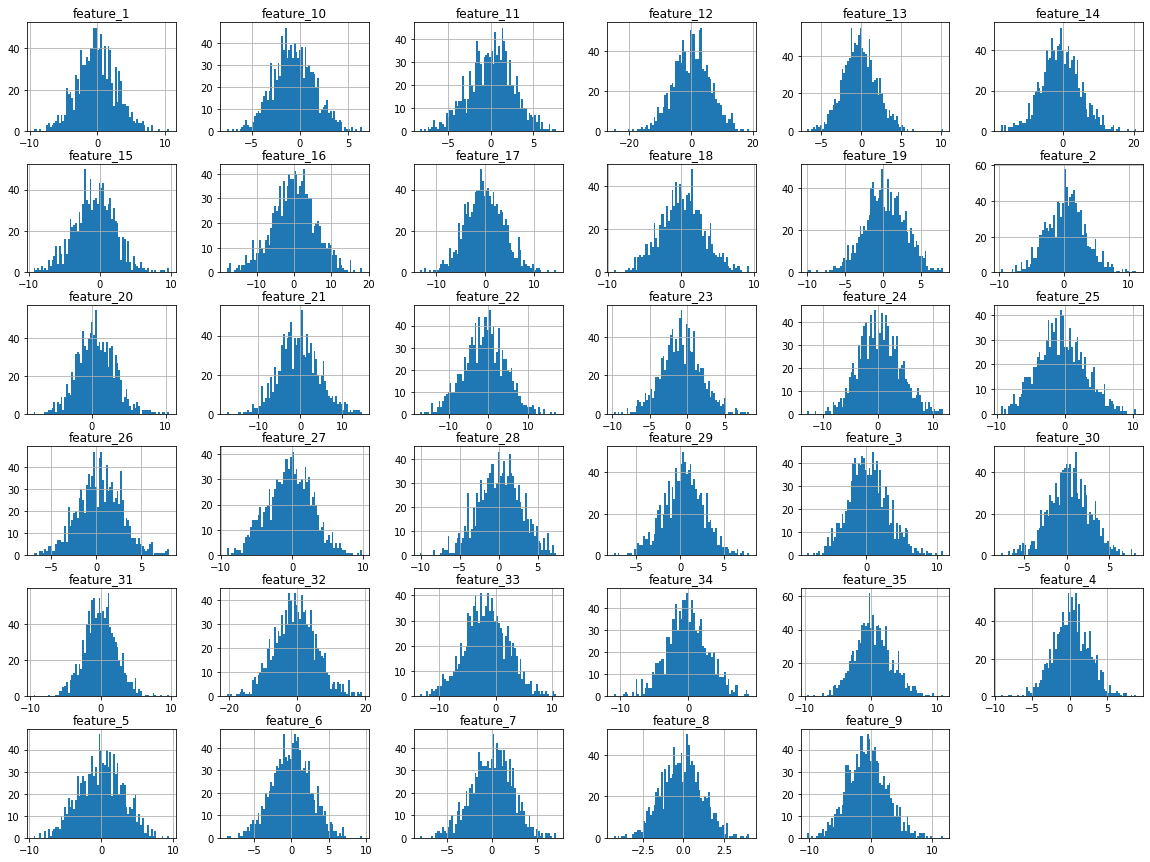

In [8]:
histo=data.hist(figsize=(20,15),bins=75)

## Correlation

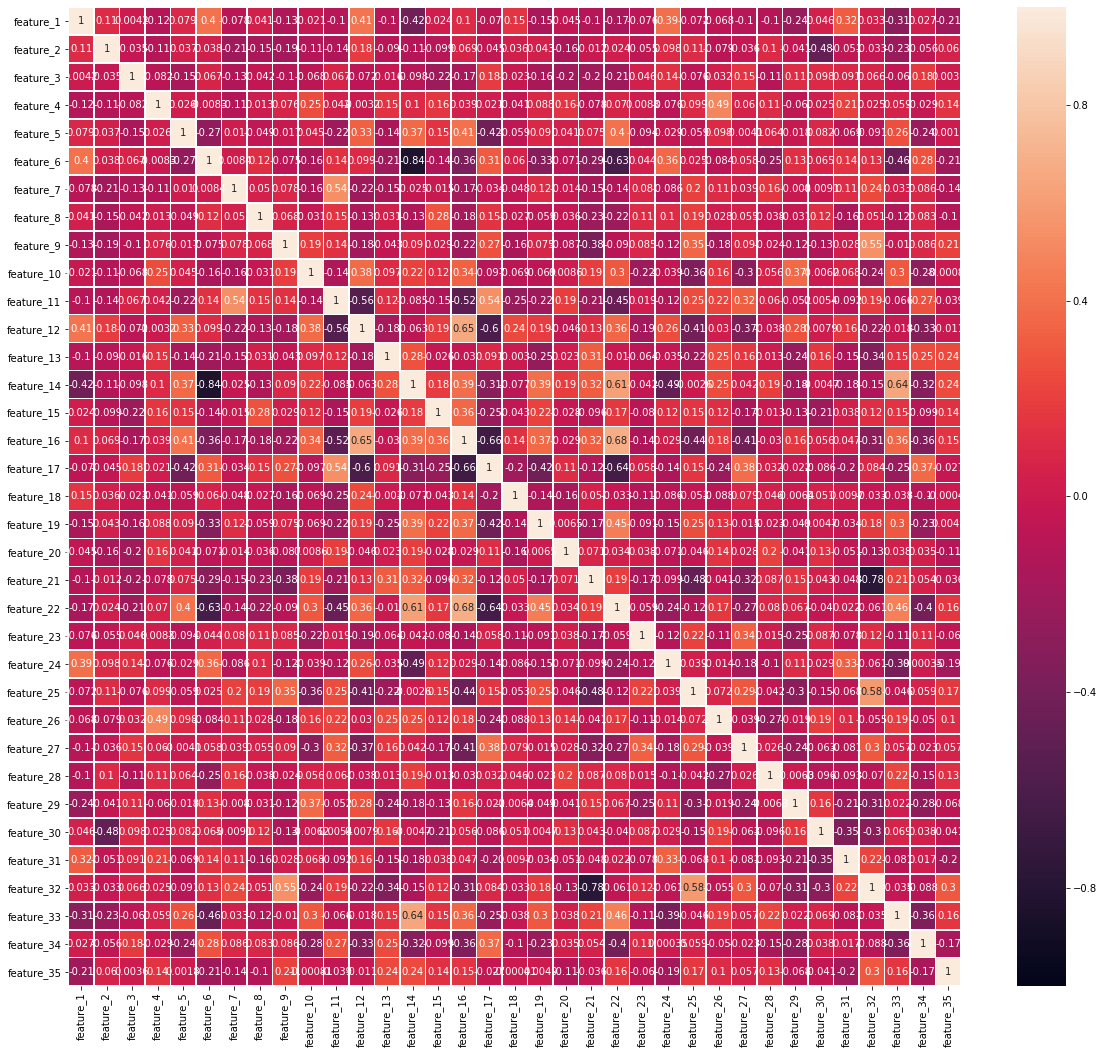

In [9]:
#Correlation Matrix
corr = data.corr()
plt.figure(figsize=(20,18))
ax=sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values, 
            vmin=-1, vmax=1, linewidths=.5, annot=True)

bottom, top = ax.get_ylim() 
lim=ax.set_ylim(bottom + 0.5, top - 0.5)


I tried analyzing correlation between features to look for features that could be excluded to make the training data cleaner. As you can see from the shades in the graph, there is no feature or group of features which are extremely positively or negatively correlated with others.

# Feature Scaling

As we have seen before, the features are quite normally distributed, so we can scale them with StandardScaler() to then perform PCA. This is also important in the context of Knn give the fact tha features wiht different scales impact distances in different ways, making it harder for Knn to perform well.

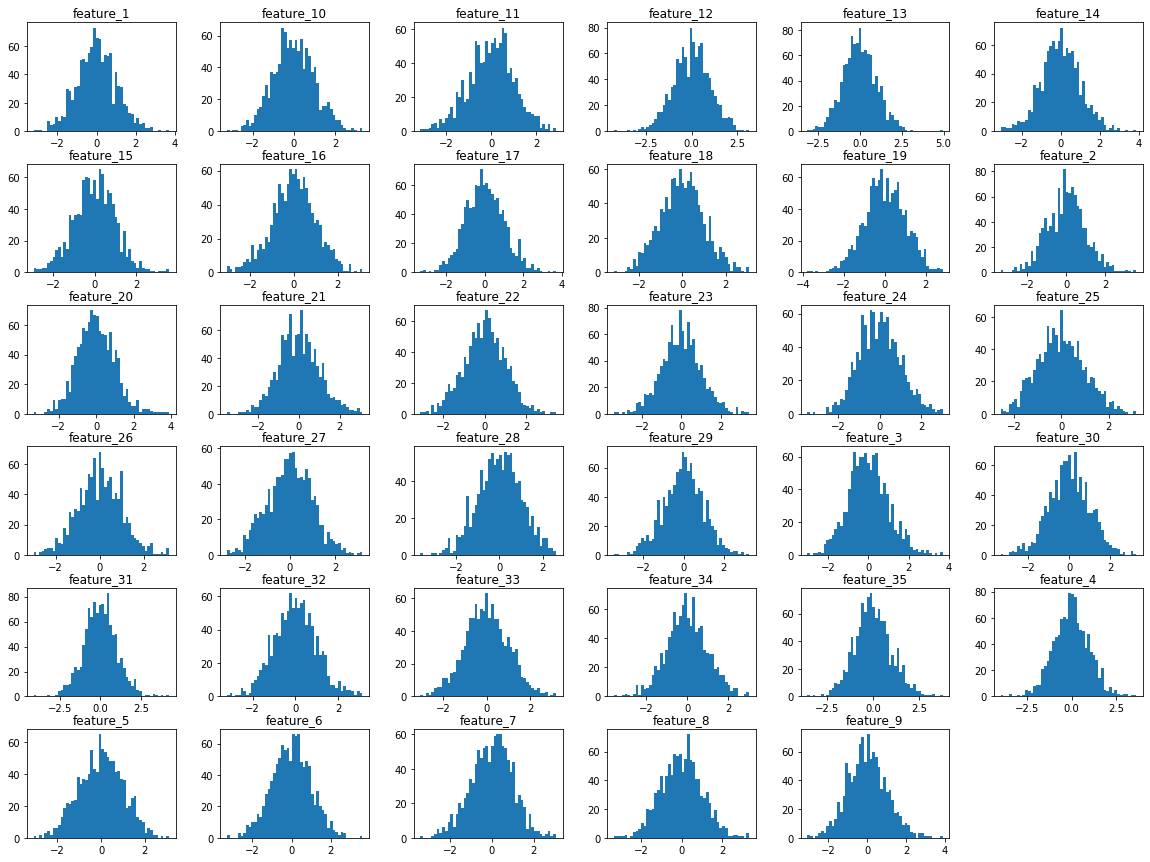

In [10]:
columns_names=data.columns
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=columns_names)
histogram=scaled_data.hist(bins=50, figsize=(20,15), grid=False)

# PCA

Now that we scaled the data we can perform a Pricipal Component Analysis to try to reduce the dimensionality of the dataset.

In [11]:
pca = PCA(n_components = 0.95)
pca.fit(scaled_data) 
cumul_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
number_comp=np.argmax(cumul_sum >= 95.0)+1
print("Num of features after PCA", number_comp)

Num of features after PCA 23


In [12]:
princ_comp = PCA(n_components=number_comp).fit_transform(scaled_data)

# Splitting data

We keep the test sets separated and use them only for the final checks of comparison. During the process we use cross validation scores to assess accuracies while using only the training data.

In [13]:
X=princ_comp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN 

KNN is a classification algorithm based on the idea that similarities in features generally means similarity in class. It acts based on this hypothesis by finding the K-nearest-neighbours (the ones less distant, with distance defined as euclidean) of the data-point we wish to estimate. Then it takes a "majority vote" and assigns to the datapoint object of the prediction the class that is most present between its K-nearest-neighbours.

We know, a priori, that Knn tends to perform worse in high dimensions. First let's focus on finding the best hyperparameter through Grid Search. The parameter we are testing for is K, which is the number of neighbours taken into consideration for each classification.
For simplicity we will set K odd in order not to cause problems with the majority votes.

For completeness, we assumed that the default Minkowski metric works fine with our dataset.

In [14]:
#Gridsearch
pipe = Pipeline([
    ('knn', KNeighborsClassifier()) 
])


params = {
    'knn__n_neighbors': [1,3, 5, 7, 9, 11, 13, 15, 23, 33] # odd numbers (33 is the sqrt of the number of samples, sometimes it works fine with knn)
}
clf = GridSearchCV(estimator=pipe,           
                  param_grid=params, 
                  cv=5,
                  return_train_score=True) 
clf.fit(X_train, y_train)
print(clf.best_params_)

{'knn__n_neighbors': 11}


We can now compute the cross validation score on the training sets, training the algorithm with the best number of neighbors given by the Grid Search method. (k=11)

In [15]:
neigh = KNeighborsClassifier(n_neighbors=11)
scores_cv_neigh=cross_val_score(neigh, X, y, cv=5)
print(scores_cv_neigh)



[0.85520362 0.89140271 0.87727273 0.89041096 0.88584475]


In [16]:
accuracy_cv_neigh=np.mean(scores_cv_neigh)
print(accuracy_cv_neigh)

0.8800269539753828


We have reached an average accuracy throughout cross validation (5-fold) of 88%. We now turn to the Logistic Regression.

# Logistic Regression


Logistic Regression is a classification algorithm that outputs a probability between 0 and 1 that can be used to predict the class to which the input belongs. To derive that probability the Logistic Regression applies a regression and uses the result of said regression as input of a Stashing function, usually the sigmoid function.

We have to tune the parameter C, so called regularization parameter. If C takes on small values it underfits the data, if C takes on big values we may run into overfitting issues.
To figure out the best hyperparameter value, we run a Grid Search on some possible values of C.


In [17]:
#Gridsearch
pipe = Pipeline([
    ('lr', LogisticRegression(solver='lbfgs')) 
])


params = {
    'lr__C': [0.001,0.01, 0.1, 1, 10, 100]
}
clf = GridSearchCV(estimator=pipe,           
                  param_grid=params, 
                  cv=5,
                  return_train_score=True) 
clf.fit(X_train, y_train)
print(clf.best_params_)

{'lr__C': 0.1}


I now show graphically how Test and Train accuracies change for different values of the hyperparameter C

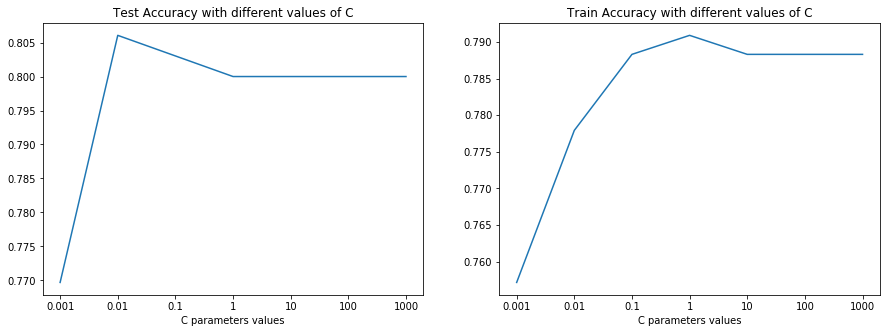

In [18]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
C_param_range_labels = ["na","0.001","0.01","0.1","1","10","100","1000"]

accuracies_test=[]
accuracies_train=[]
for i in range(7):
    lr = LogisticRegression(penalty='l2', C = C_param_range[i], random_state = 0, solver='lbfgs')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracies_test.append(accuracy_score(y_test, y_pred))
    y_pred_train = lr.predict(X_train)
    accuracies_train.append(accuracy_score(y_pred_train, y_train))
    

    
f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(121)
ax2=f.add_subplot(122)

ax1.set_title('Test Accuracy with different values of C')
ax1.set_xlabel('C parameters values')
ax1.set_xticklabels(C_param_range_labels)

ax2.set_title('Train Accuracy with different values of C')
ax2.set_xticklabels(C_param_range_labels)
ax2.set_xlabel('C parameters values')


plot1=ax1.plot(np.arange(7), accuracies_test)
plot2=ax2.plot(np.arange(7), accuracies_train)

We can see from the first graph that the highest test accuracy value of C is 0.01

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
lr = LogisticRegression(solver='lbfgs', C=0.1)
scores_cv_log=cross_val_score(lr, X, y, cv=5)
print(scores_cv_log)

[0.75113122 0.7918552  0.78636364 0.82648402 0.80365297]


In [20]:
accuracy_cv_log=np.mean(scores_cv_log)
print(accuracy_cv_log)

0.7918974096008744


We have reached an average accuracy throughout cross validation (5-fold) of 79%. We now turn to the proper comperison of the two methods.

# Comparison

Let's now compare the two algorithms we used with some useful metrics.

## Accuracy

We now compute and compare the accuracy values on the test set for the two algorithms.

In [21]:
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)
y_pred_neigh = neigh.predict(X_test)
accuracy_score(y_test, y_pred_neigh)

0.8636363636363636

In [22]:
lr = LogisticRegression(solver='lbfgs', C=0.1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.803030303030303

## Precision and Recall

We now plot the precision and recall cuves. Spiegazione di cosa siano

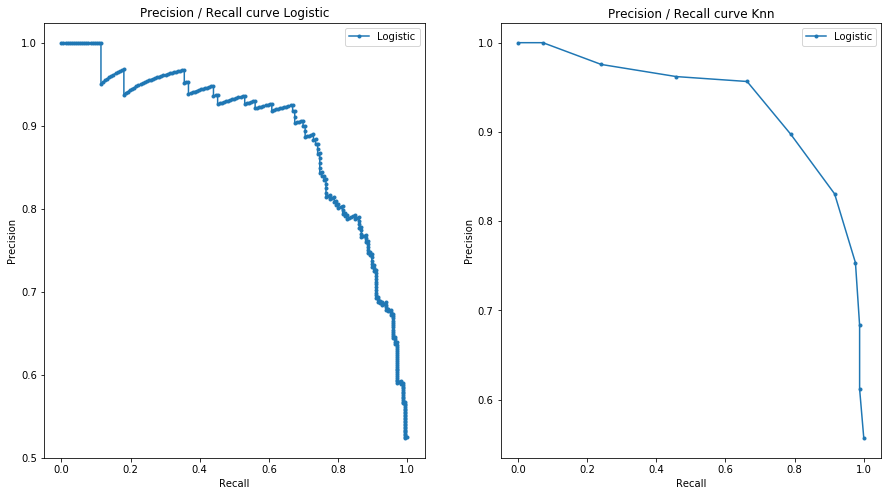

In [23]:
# precision-recall curve
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122)  
ax_list=[ax1,ax2]
label_list=["Logistic", "Knn"]
for i in range(2):
    if i==0:
        #First graph: Logistic
        model = LogisticRegression(solver='lbfgs', C=0.1)
    else:
        #Second graph: Knn
        model=KNeighborsClassifier(n_neighbors=11)
    
    ax=ax_list[i]
    model.fit(X_train, y_train)
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # predict class values
    yhat = model.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, probs)    
    # plot the precision-recall curve
    ax.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title("Precision / Recall curve "+label_list[i])
    # show the legend
    ax.legend()


## F1 Score

The F1 score is the weighted average of precision and recall. An F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: 
$$F1=2*\frac{precision*recall}{precision+recall}$$

The "average" parameter determines the type of averaging performed on the data. For completeness, the three possibilities are shown.



In [24]:
print("KNN F1 Scores")
print("Macro F1: ", f1_score(y_test, y_pred_neigh, average='macro'))
print("Micro F1: ",f1_score(y_test, y_pred_neigh, average='micro'))
print("Weighted F1: ",f1_score(y_test, y_pred_neigh, average='weighted'))

KNN F1 Scores
Macro F1:  0.8631828190788564
Micro F1:  0.8636363636363636
Weighted F1:  0.8632305606112256


In [25]:
print("Logistic Regression F1 Scores")
print("Macro F1: ",f1_score(y_test, y_pred_lr, average='macro'))
print("Micro F1: ",f1_score(y_test, y_pred_lr, average='micro'))
print("Weighted F1: ",f1_score(y_test, y_pred_lr, average='weighted'))

Logistic Regression F1 Scores
Macro F1:  0.8030284942928769
Micro F1:  0.803030303030303
Weighted F1:  0.8030248768180245


## ROC Curve

The ROC curve is a graphical plot that shows the performance of a binary classifier as its so-called "discrimination threshold" is varied.

The number of true positives out of the positives - i.e. the True Positive Rate - is plotted against the number of false positives out of the negatives - i.e. False Positive Rate.

The Area under the curve (hereinafter, AUC) is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative one (assuming 'positive' ranks higher than 'negative').

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0 and one whose predictions are 100% correct has an AUC of 1.0.

Logistic ROC AUC  0.8915662650602408
Knn ROC AUC  0.9375550984425507


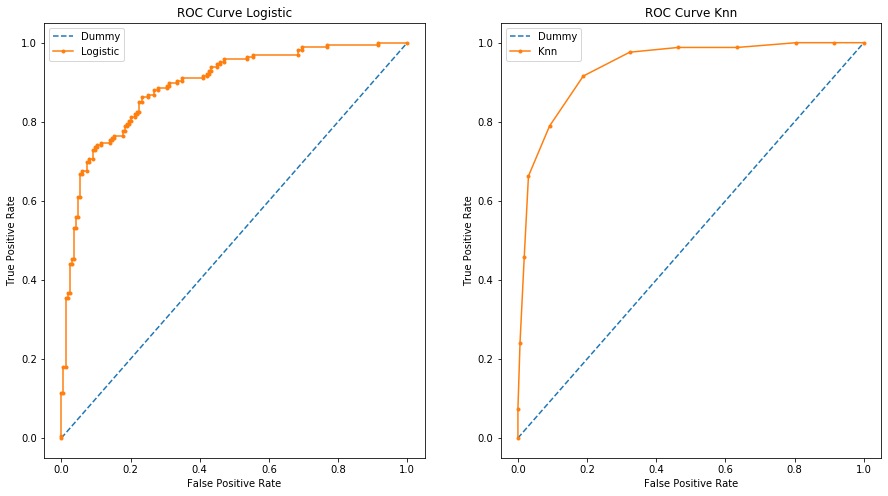

In [26]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122)  
ax_list=[ax1,ax2]
label_list=["Logistic", "Knn"]
for i in range(2):
    if i==0:
        model = LogisticRegression(solver='lbfgs', C=0.1)
    else:
        model=KNeighborsClassifier(n_neighbors=11)

    model.fit(X_train, y_train)
    yhat = model.predict_proba(X_test)
    pos_probs = yhat[:, 1]
    # plot dummy roc curve
    ax=ax_list[i]
    ax.plot([0, 1], [0, 1], linestyle='--', label='Dummy')
    # calculate roc curve for model
    fpr, tpr, _ = roc_curve(y_test, pos_probs)
    label=label_list[i]
    # plot model roc curve
    ax.plot(fpr, tpr, marker='.', label=label)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend()
    ax.set_title("ROC Curve "+label_list[i])
    roc_auc = roc_auc_score(y_test, pos_probs)
    print(label_list[i], "ROC AUC ", roc_auc)

# Conclusion

**Data preparation**

PCA was performed with 23 components
Data were scaled with a StandardScaler

**Parameters**

The number of neighbors found for Knn is 11.

The regularization parameter found for Logistic Regression is 0.1

**Choice**

Even though we would not have expected so, among the two algorithms, the method that performed better is the Knn. It had a better accuracy, a better F1 score and a better ROC AUC.

Finally, let's create a database (and print it onto a file) with the class assigned and the true labels of the test set.

In [31]:
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train)
y_pred_neigh = neigh.predict(X_test)
predicted_data= pd.DataFrame()
predicted_data["Class assigned"]=y_pred_neigh
predicted_data["True label"]=y
predicted_data.to_csv('Class.csv', sep=',', index=True)
predicted_data

,Class assigned,True label
0,1,1
1,1,0
2,1,0
3,1,1
4,1,0
...,...,...
325,1,1
326,0,0
327,0,0
328,1,1
